# UECS3453 Data Mining
# Assignment 2 
## Chong Woon Yung
## 1507838


### Introduction
Fashion-MNIST is a dataset consists of total 70000 images. It splits in to 60000 training set and 10000 test set. Each image represent one label including
1. T-shirt
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

This assignment cover three classifiers using sklearn, perform prediction and show the confusion matrix.

Libraries I use for this project:

In [1]:
import mnist_reader
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
#classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

#### Read dataset
Git clone the repository(https://github.com/zalandoresearch/fashion-mnist.git).

We can use the mnist_reader provided by fashion-MNIST to read the dataset. Code as cell below.

Data dictionary
- X_train contains 60000 datasets, each data set is a 28x28 pixel image.
- y_train contains 60000 datasets which represent the X_train label.
- X_test is unseen data to let the trained classifier to predict the outcome.
- y_test represent the label for X_test.

Labels is for the confusion matrix chart showing the lable name instead of number 0-9.

In [2]:
X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### Data visualize

An example of image in X_train. The dataset is in 784 pixel, therefore we need to reshape it into 28 x 28.

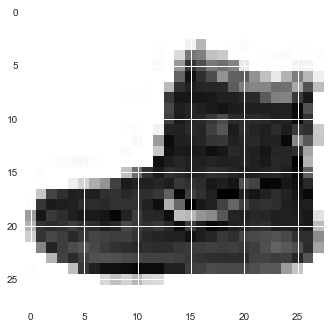

In [3]:
#showing 1st image
x_1 = X_train[0].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(x_1,cmap='gray_r')
plt.show()

Categorize images into respective label. 

tshirt =  (6000, 784)
trouser =  (6000, 784)
pullover =  (6000, 784)
dress =  (6000, 784)
coat =  (6000, 784)
sandal =  (6000, 784)
shirt =  (6000, 784)
sneaker =  (6000, 784)
bag =  (6000, 784)
boot =  (6000, 784)


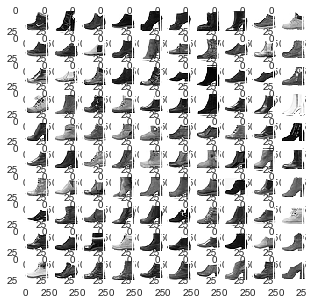

In [4]:
#Convert data in array and save in z, which z consists data with label.
x = np.array(X_train)
y = np.array(y_train)
z = [x,y]

#find the correct lable and save accordingly
t_shirt = z[1]==0
trouser = z[1]==1
pullover = z[1]==2
dress = z[1]==3
coat = z[1]==4
sandal = z[1]==5
shirt = z[1]==6
sneaker = z[1]==7
bag = z[1]==8
boot = z[1]==9

#Each label has 6000 item.
print("tshirt = ", z[0][t_shirt].shape)
print("trouser = ", z[0][trouser].shape)
print("pullover = ", z[0][pullover].shape)
print("dress = ", z[0][dress].shape)
print("coat = ", z[0][coat].shape)
print("sandal = ", z[0][sandal].shape)
print("shirt = ", z[0][shirt].shape)
print("sneaker = ", z[0][sneaker].shape)
print("bag = ", z[0][bag].shape)
print("boot = ", z[0][boot].shape)

#save each label in variable
t1 = z[0][t_shirt]
t2 = z[0][trouser]
t3 = z[0][pullover]
t4 = z[0][dress]
t5 = z[0][coat]
t6 = z[0][sandal]
t7 = z[0][shirt]
t8 = z[0][sneaker]
t9 = z[0][bag]
t10 = z[0][boot]

#show ankle boot
fig = plt.figure(figsize=(5,5))
for i in range(0,100):
    x_2 = t10[i].reshape(28,28)
    fig.add_subplot(10,10,i+1)
    plt.imshow(x_2)
plt.show()   

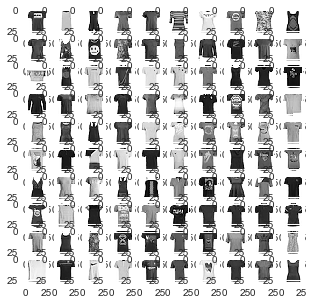

In [5]:
#show T-shirt
fig = plt.figure(figsize=(5,5))
for i in range(0,100):
    x_2 = t1[i].reshape(28,28)
    fig.add_subplot(10,10,i+1)
    plt.imshow(x_2)
plt.show()  

### Develop Classifiers

Three classifiers are used in this project
1. KNeighbor Classifier
2. MLP Classifier
3. SVC Classifier

#### KNeighbor Classifier

In [ ]:
#KNeighbor Classifier using parameter n_neighbor = 5
#Kneighbor has the longest time and lowest accuracy

neigh = KNeighborsClassifier(n_neighbors = 5)
%time neigh.fit(X_train, y_train)

k_predict = neigh.predict(X_test)
k_correct = np.sum(k_predict == y_test)
k_total = X_test.shape[0]
k_accuracy = k_correct/k_total*100
#print(k_correct)
#print(k_total)
print('accuracy using traditional way = ', k_accuracy)
print('accuracy using accuracy_score method = ', accuracy_score(y_test,k_predict))
k_array = confusion_matrix(y_test, k_predict)
df_cm = pd.DataFrame(k_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

Wall time: 25.7 s


#### MLP Classifier

In [ ]:
#MLPClassifier using parameter hidden_layer_sizes=256,128,64
#MLPClassifier has the shortest time and average accuracy 

MLP = MLPClassifier(hidden_layer_sizes=(256,128,64))
%time MLP.fit(X_train, y_train)

MLP_predict = MLP.predict(X_test)
MLP_correct = np.sum(MLP_predict == y_test)
MLP_total = X_test.shape[0]
MLP_accuracy = MLP_correct/MLP_total*100
#print(MLP_correct)
#print(MLP_total)
print('accuracy using traditional way = ',MLP_accuracy)
print('accuracy using accuracy_score method = ',accuracy_score(y_test,MLP_predict))
MLP_array = confusion_matrix(y_test, MLP_predict)
df_cm = pd.DataFrame(MLP_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### SVC Classifier

In [ ]:
#SVC using parameter kernel = 'poly'
#SVC has the average time and highest accuracy

s = svm.SVC(kernel = 'poly')
#train data
%time s.fit(X_train, y_train)

#calculate the accuracy
s_predict = s.predict(X_test)
s_correct = np.sum(s_predict == y_test)
s_total = X_test.shape[0]
s_accuracy = s_correct/s_total*100
#print(s_correct)
#print(s_total)
print('accuracy using traditional way = ',s_accuracy)
print('accuracy using accuracy_score method = ',accuracy_score(y_test,s_predict))

#print the table
s_array = confusion_matrix(y_test, s_predict)
df_cm = pd.DataFrame(s_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### Benchmark


| Classifier        | Time           | Accuracy  |
| ------------- |:-------------:| -----:|
| KNeighbor      | ??? | ??? |
| MLB      | ???      |   ??? |
| SVC | ???      |   ???|



### Observation and comment

### Suggestion to improve
Given more time
- try more different parameter to tune the accuracy of each classifier.
- try more classfier like 
    - ExtraTreeClassifier
    - DecisionTreeClassifier
    - SGDClassifier
    - RandomForestClassifier
    - GradientBoostingClassifier
    
Moreover, data visualization using tensorflow is another part I would like to explore. Because it can use 3D data visualization.
